In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
import joblib
import pickle
import catboost
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [57]:
print("scikit-learn version:", sklearn.__version__)
print("joblib version:", joblib.__version__)
print("catboost version:", catboost.__version__)

scikit-learn version: 1.3.0
joblib version: 1.2.0
catboost version: 1.2


In [2]:
laptop_df = pd.read_csv("Laptop_log_data.csv")
server_df = pd.read_csv("Server_log_data.csv")

In [3]:
laptop_df

,Laptop ID,Laptop Model,Laptop Status,Fan Faulty,Disk Usage (%),CPU Usage (%),Memory Usage (%),Manufacturer,Processor Type,Screen Size (inch),Battery Capacity (Wh),Number of USB Ports,Graphics Card,Bluetooth,Wi-Fi,Touch Screen,Weight (kg),Target
0,c37dae4b-bfcc-43cf-938a-e9218ec74516,Laptop Model A,Active,0,30.06,88.35,69.38,HP,AMD Ryzen 7,17,50,2,NVIDIA GeForce GTX 1650,Yes,Yes,Yes,2.08,1
1,1b9466f3-98a0-45dd-be28-eddf9f88697f,Laptop Model C,Active,1,30.13,34.49,63.68,Dell,AMD Ryzen 7,15,50,3,Integrated Graphics,No,No,Yes,1.51,1
2,5975b995-397a-4d93-8727-70f54ebaf4b5,Laptop Model A,Offline,0,14.19,59.40,29.52,Asus,Intel Core i7,15,50,3,Integrated Graphics,Yes,Yes,Yes,1.35,0
3,a8c99c95-f8f3-4869-8c70-34f6e2918a0e,Laptop Model A,Offline,0,58.38,33.90,43.29,Lenovo,AMD Ryzen 7,17,40,2,Integrated Graphics,Yes,No,No,1.94,0
4,3cca0c5d-48c2-4cd8-be6a-7a80f6336e79,Laptop Model B,Offline,0,35.19,88.46,32.31,Asus,Intel Core i7,14,60,3,NVIDIA GeForce GTX 1650,No,Yes,Yes,1.44,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,024d2d58-9fc4-48a3-bb87-f118cedfa91e,Laptop Model A,Active,1,88.21,72.17,23.56,Asus,AMD Ryzen 7,17,50,4,NVIDIA GeForce GTX 1650,No,Yes,Yes,2.06,1
14996,0b24b3dc-84a8-4870-a1fa-9643ecdda596,Laptop Model A,Active,1,83.24,10.66,39.73,HP,Intel Core i7,14,40,3,Integrated Graphics,No,No,Yes,1.27,1
14997,4aa77a89-fdd0-4fbc-b443-0b31192bfa95,Laptop Model A,Active,0,86.26,47.39,82.06,Dell,Intel Core i5,17,60,4,NVIDIA GeForce GTX 1650,No,Yes,Yes,1.39,1
14998,18820c8b-2d94-4503-b927-5472a46c8788,Laptop Model C,Active,0,56.30,40.12,29.07,HP,Intel Core i7,17,40,4,NVIDIA GeForce GTX 1650,No,Yes,Yes,1.42,0


In [4]:
server_df

,Server ID,Server Name,Server Status,Disk Usage (%),CPU Usage (%),Memory Usage (%),Operating System,Number of CPU Cores,RAM Capacity (GB),Network Traffic (Mbps),Disk I/O (IOPS),Server Location,Server Uptime (days),Target
0,0560324d-9473-4601-9c36-663d91b1cc52,Server C,Offline,93.05,11.51,56.95,Linux,16,16,40.37,26.64,Data Center,230,1
1,b8baa62c-68d9-4257-9fd2-679ead3de617,Server C,Offline,70.71,52.34,80.44,Windows Server,6,64,35.32,69.85,Office,146,0
2,f240e773-15a5-4688-af7c-5b68aff2e679,Server A,Offline,45.90,36.88,90.65,Ubuntu Server,16,8,22.32,16.49,Office,136,1
3,a6d5bf90-c43f-40c8-929e-a27f34f3d20f,Server A,Online,33.50,13.56,64.80,Linux,8,8,98.19,75.33,Office,140,1
4,c3fea11b-838c-4316-9203-e088b6768555,Server C,Online,82.50,24.92,80.64,Windows Server,8,8,38.75,52.07,Data Center,338,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,979bd5b3-36f6-42f0-ae59-bb2afe8b1725,Server C,Online,94.76,10.03,80.42,Windows Server,6,16,36.25,67.38,Data Center,212,1
14996,afb197b1-304b-4d00-8fa2-85869211355a,Server A,Offline,58.87,89.36,77.66,Windows Server,4,8,10.75,37.87,Data Center,341,1
14997,a1bc98b2-07db-4eda-8c49-a1f997d751c2,Server C,Online,89.15,15.73,61.71,Linux,4,8,75.45,83.26,Office,297,1
14998,da04ac97-3b2d-43e7-9356-da8402d9211f,Server C,Online,44.13,52.45,68.23,Ubuntu Server,4,16,13.18,64.57,Office,276,1


In [5]:
server_df.columns

Index(['Server ID', 'Server Name', 'Server Status', 'Disk Usage (%)',
       'CPU Usage (%)', 'Memory Usage (%)', 'Operating System',
       'Number of CPU Cores', 'RAM Capacity (GB)', 'Network Traffic (Mbps)',
       'Disk I/O (IOPS)', 'Server Location', 'Server Uptime (days)', 'Target'],
      dtype='object')

In [6]:
for column in server_df.columns[1:]:
    if server_df[column].dtype == 'object':
        unique = server_df[column].unique()
        print(f"unique variables in {column} are: {unique}")
    else:
        small = server_df[column].min()
        big = server_df[column].max()
        print(f"The values in {column} are in the range {small} - {big}")

unique variables in Server Name are: ['Server C' 'Server A' 'Server B']
unique variables in Server Status are: ['Offline' 'Online']
The values in Disk Usage (%) are in the range 10.01 - 94.99
The values in CPU Usage (%) are in the range 10.01 - 94.99
The values in Memory Usage (%) are in the range 10.0 - 95.0
unique variables in Operating System are: ['Linux' 'Windows Server' 'Ubuntu Server']
The values in Number of CPU Cores are in the range 4 - 16
The values in RAM Capacity (GB) are in the range 8 - 64
The values in Network Traffic (Mbps) are in the range 10.0 - 100.0
The values in Disk I/O (IOPS) are in the range 10.0 - 99.97
unique variables in Server Location are: ['Data Center' 'Office']
The values in Server Uptime (days) are in the range 1 - 365
The values in Target are in the range 0 - 1


In [7]:
laptop_df.columns

Index(['Laptop ID', 'Laptop Model', 'Laptop Status', 'Fan Faulty',
       'Disk Usage (%)', 'CPU Usage (%)', 'Memory Usage (%)', 'Manufacturer',
       'Processor Type', 'Screen Size (inch)', 'Battery Capacity (Wh)',
       'Number of USB Ports', 'Graphics Card', 'Bluetooth', 'Wi-Fi',
       'Touch Screen', 'Weight (kg)', 'Target'],
      dtype='object')

In [8]:
for column in laptop_df.columns[1:]:
    if laptop_df[column].dtype == 'object':
        unique = laptop_df[column].unique()
        print(f"unique variables in {column} are: {unique}")
    else:
        small = laptop_df[column].min()
        big = laptop_df[column].max()
        print(f"The values in {column} are in the range {small} - {big}")

unique variables in Laptop Model are: ['Laptop Model A' 'Laptop Model C' 'Laptop Model B']
unique variables in Laptop Status are: ['Active' 'Offline']
The values in Fan Faulty are in the range 0 - 1
The values in Disk Usage (%) are in the range 10.01 - 95.0
The values in CPU Usage (%) are in the range 10.01 - 95.0
The values in Memory Usage (%) are in the range 10.0 - 95.0
unique variables in Manufacturer are: ['HP' 'Dell' 'Asus' 'Lenovo']
unique variables in Processor Type are: ['AMD Ryzen 7' 'Intel Core i7' 'Intel Core i5']
The values in Screen Size (inch) are in the range 13 - 17
The values in Battery Capacity (Wh) are in the range 40 - 70
The values in Number of USB Ports are in the range 2 - 4
unique variables in Graphics Card are: ['NVIDIA GeForce GTX 1650' 'Integrated Graphics']
unique variables in Bluetooth are: ['Yes' 'No']
unique variables in Wi-Fi are: ['Yes' 'No']
unique variables in Touch Screen are: ['Yes' 'No']
The values in Weight (kg) are in the range 1.0 - 2.5
The val

In [9]:
# Preprocessing pipeline for Scenario 1 (Laptops)
def preprocess_laptop_data(df):
    # Select features and target variable
    X = df.drop(columns=['Laptop ID', 'Target'])
    y = df['Target']

    # Encode categorical variables (Laptop Model, Laptop Status, Manufacturer, Processor Type, Graphics Card, Bluetooth, Wi-Fi, Touch Screen)
    categorical_features = ['Laptop Model', 'Laptop Status', 'Manufacturer', 'Processor Type', 'Graphics Card', 'Bluetooth', 'Wi-Fi', 'Touch Screen']
    categorical_transformer = OneHotEncoder(drop='first')

    # Scale numerical features (Disk Usage (%), CPU Usage (%), Memory Usage (%), Screen Size (inch), Battery Capacity (Wh), Number of USB Ports, Weight (kg))
    numerical_features = ['Disk Usage (%)', 'CPU Usage (%)', 'Memory Usage (%)', 'Screen Size (inch)', 'Battery Capacity (Wh)', 'Number of USB Ports', 'Weight (kg)']
    numerical_transformer = StandardScaler()

    # Combine the transformations
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_features),
            ('num', numerical_transformer, numerical_features)
        ])
    
    # saving the preprocessing pipeline

    joblib.dump(preprocessor, 'laptop_preprocessor_pipeline.joblib')
    
    preprocessor_ = joblib.load('laptop_preprocessor_pipeline.joblib')

    # Apply preprocessing to the data
    X_preprocessed = preprocessor.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test


In [10]:
# Preprocessing pipeline for Scenario 2 (Servers)
def preprocess_server_data(df):
    # Select features and target variable
    X = df.drop(columns=['Server ID', 'Server Name', 'Target'])
    y = df['Target']

    # Encode categorical variables (Server Status, Operating System, Server Location)
    categorical_features = ['Server Status', 'Operating System', 'Server Location']
    categorical_transformer = OneHotEncoder(drop='first')

    # Scale numerical features (Disk Usage (%), CPU Usage (%), Memory Usage (%), Number of CPU Cores, RAM Capacity (GB), Network Traffic (Mbps), Disk I/O (IOPS), Server Uptime (days))
    numerical_features = ['Disk Usage (%)', 'CPU Usage (%)', 'Memory Usage (%)', 'Number of CPU Cores', 'RAM Capacity (GB)', 'Network Traffic (Mbps)', 'Disk I/O (IOPS)', 'Server Uptime (days)']
    numerical_transformer = StandardScaler()

    # Combine the transformations
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', categorical_transformer, categorical_features),
            ('num', numerical_transformer, numerical_features)
        ])
    # saving the preprocessing pipeline

    joblib.dump(preprocessor, 'server_preprocessor_pipeline.joblib')
    
    preprocessor_ = joblib.load('server_preprocessor_pipeline.joblib')
    # Apply preprocessing to the data
    X_preprocessed = preprocessor_.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test


In [11]:
# Preprocess laptop data
X_train_laptops, X_test_laptops, y_train_laptops, y_test_laptops = preprocess_laptop_data(laptop_df)

# Preprocess server data
X_train_servers, X_test_servers, y_train_servers, y_test_servers = preprocess_server_data(server_df)

In [12]:
X_train_laptops.shape

(12000, 19)

In [14]:
# Train and test machine learning models for laptops
def train_and_evaluate_laptop_models(df):
    X_train, X_test, y_train, y_test = preprocess_laptop_data(df)

    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(n_estimators=500, random_state=42),
        "SVC": SVC(probability=True),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "catboost_classifier" : CatBoostClassifier(random_state=42, ),
        "xgboost_classifier" : XGBClassifier(seed=42)
    }

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        # # Feature Importance
        # if hasattr(model, 'feature_importances_'):
        #     feature_importances = model.feature_importances_
        # else:
        #     # Logistic Regression doesn't have feature_importances_, use coefficients for feature importance
        #     feature_importances = np.abs(model.coef_[0])

        # feature_names = df.drop(columns=['Laptop ID', 'Target']).columns

        # # Sort feature importances in descending order
        # sorted_indices = np.argsort(feature_importances)[::-1]

        # # Plot the feature importances as a bar graph
        # plt.figure(figsize=(10, 6))
        # plt.bar(range(len(feature_importances)), feature_importances[sorted_indices])
        # plt.xticks(range(len(feature_importances)), feature_names[sorted_indices], rotation=45, ha='right')
        # plt.xlabel('Features')
        # plt.ylabel('Importance')
        # plt.title('Feature Importance from Random Forest')
        # plt.tight_layout()
        # plt.show()

        # Classification Report
        print(f"{model_name} Classification Report:")
        print(classification_report(y_test, y_pred))

        # ROC-AUC Curve
        roc_auc = roc_auc_score(y_test, y_prob)
        fpr, tpr, _ = roc_curve(y_test, y_prob)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} - ROC-AUC Curve')
        plt.legend(loc='lower right')
        plt.show()






Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.19      0.28       948
           1       0.71      0.91      0.80      2052

    accuracy                           0.68      3000
   macro avg       0.60      0.55      0.54      3000
weighted avg       0.64      0.68      0.63      3000



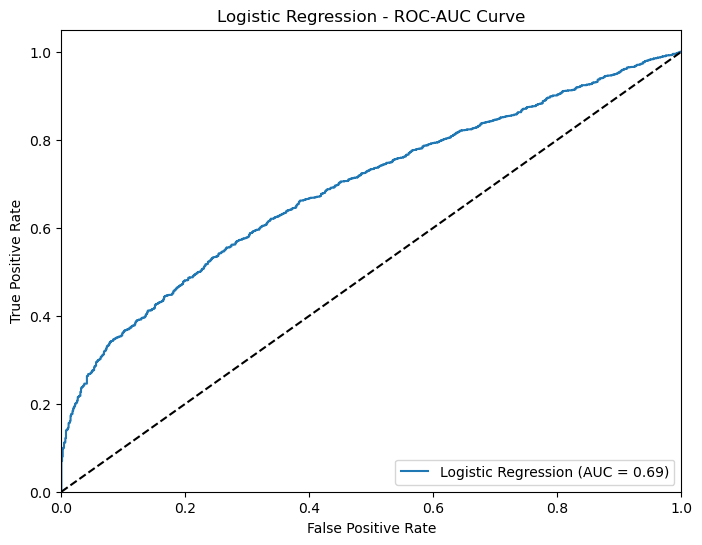

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.43      0.47       948
           1       0.76      0.82      0.79      2052

    accuracy                           0.70      3000
   macro avg       0.64      0.62      0.63      3000
weighted avg       0.68      0.70      0.69      3000



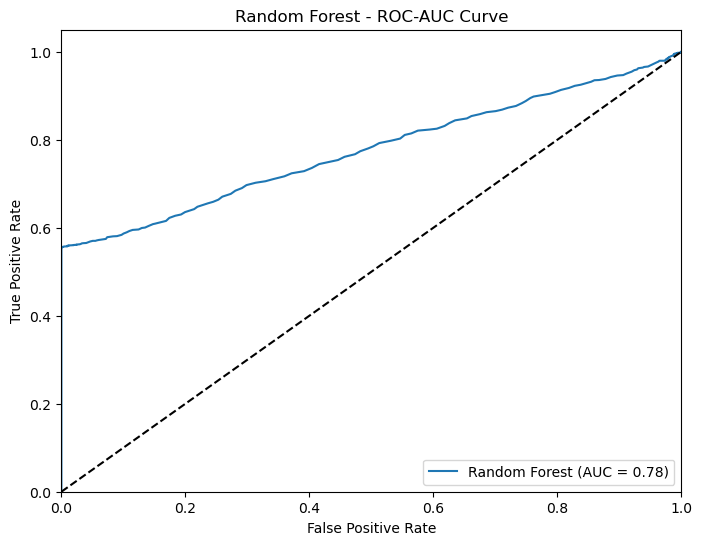

SVC Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.17      0.25       948
           1       0.70      0.92      0.80      2052

    accuracy                           0.68      3000
   macro avg       0.59      0.54      0.52      3000
weighted avg       0.63      0.68      0.62      3000



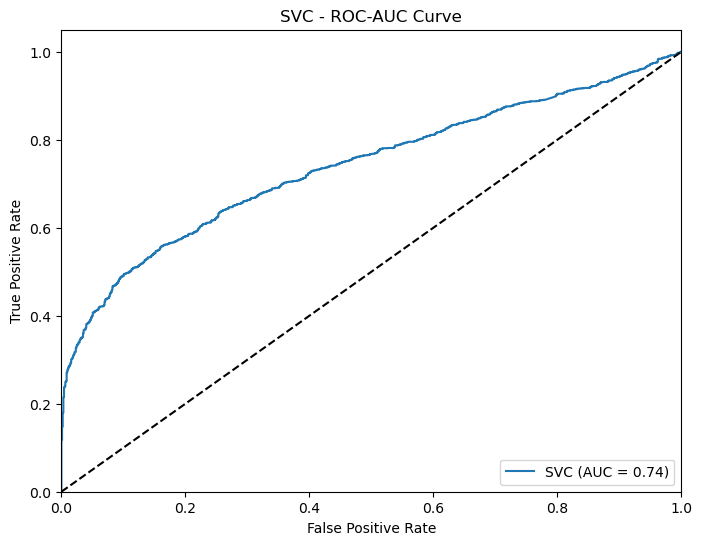

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.50      0.51       948
           1       0.77      0.78      0.78      2052

    accuracy                           0.69      3000
   macro avg       0.64      0.64      0.64      3000
weighted avg       0.69      0.69      0.69      3000



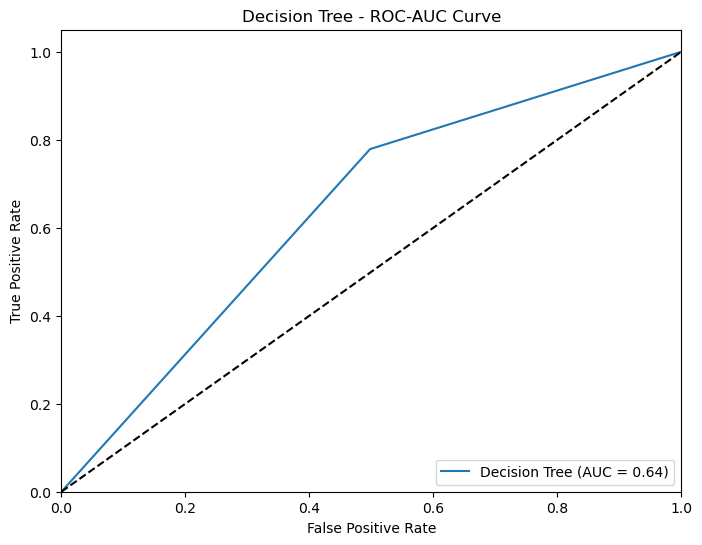

Learning rate set to 0.029768
0:	learn: 0.6710800	total: 174ms	remaining: 2m 54s
1:	learn: 0.6506009	total: 207ms	remaining: 1m 43s
2:	learn: 0.6308843	total: 239ms	remaining: 1m 19s
3:	learn: 0.6113017	total: 267ms	remaining: 1m 6s
4:	learn: 0.5978951	total: 296ms	remaining: 58.9s
5:	learn: 0.5805834	total: 321ms	remaining: 53.2s
6:	learn: 0.5716709	total: 349ms	remaining: 49.4s
7:	learn: 0.5566213	total: 376ms	remaining: 46.6s
8:	learn: 0.5426009	total: 404ms	remaining: 44.5s
9:	learn: 0.5339619	total: 435ms	remaining: 43.1s
10:	learn: 0.5262057	total: 468ms	remaining: 42.1s
11:	learn: 0.5171564	total: 498ms	remaining: 41s
12:	learn: 0.5102608	total: 528ms	remaining: 40.1s
13:	learn: 0.5029862	total: 559ms	remaining: 39.3s
14:	learn: 0.4973018	total: 589ms	remaining: 38.7s
15:	learn: 0.4917383	total: 619ms	remaining: 38.1s
16:	learn: 0.4887032	total: 649ms	remaining: 37.5s
17:	learn: 0.4843520	total: 680ms	remaining: 37.1s
18:	learn: 0.4810869	total: 707ms	remaining: 36.5s
19:	learn:

163:	learn: 0.4291302	total: 2.16s	remaining: 11s
164:	learn: 0.4289491	total: 2.19s	remaining: 11.1s
165:	learn: 0.4288251	total: 2.22s	remaining: 11.1s
166:	learn: 0.4286501	total: 2.25s	remaining: 11.2s
167:	learn: 0.4285403	total: 2.27s	remaining: 11.3s
168:	learn: 0.4283756	total: 2.3s	remaining: 11.3s
169:	learn: 0.4282571	total: 2.33s	remaining: 11.4s
170:	learn: 0.4281278	total: 2.35s	remaining: 11.4s
171:	learn: 0.4279971	total: 2.39s	remaining: 11.5s
172:	learn: 0.4277936	total: 2.42s	remaining: 11.5s
173:	learn: 0.4276692	total: 2.44s	remaining: 11.6s
174:	learn: 0.4275305	total: 2.47s	remaining: 11.7s
175:	learn: 0.4273918	total: 2.5s	remaining: 11.7s
176:	learn: 0.4272326	total: 2.53s	remaining: 11.7s
177:	learn: 0.4270492	total: 2.56s	remaining: 11.8s
178:	learn: 0.4269407	total: 2.58s	remaining: 11.8s
179:	learn: 0.4267626	total: 2.61s	remaining: 11.9s
180:	learn: 0.4266183	total: 2.64s	remaining: 11.9s
181:	learn: 0.4264706	total: 2.67s	remaining: 12s
182:	learn: 0.4263

339:	learn: 0.4058044	total: 4.24s	remaining: 8.24s
340:	learn: 0.4056686	total: 4.25s	remaining: 8.22s
341:	learn: 0.4054925	total: 4.26s	remaining: 8.2s
342:	learn: 0.4053600	total: 4.27s	remaining: 8.18s
343:	learn: 0.4052258	total: 4.28s	remaining: 8.16s
344:	learn: 0.4050590	total: 4.29s	remaining: 8.14s
345:	learn: 0.4049376	total: 4.29s	remaining: 8.12s
346:	learn: 0.4047239	total: 4.3s	remaining: 8.1s
347:	learn: 0.4045996	total: 4.31s	remaining: 8.07s
348:	learn: 0.4044424	total: 4.32s	remaining: 8.05s
349:	learn: 0.4043075	total: 4.33s	remaining: 8.04s
350:	learn: 0.4041656	total: 4.33s	remaining: 8.02s
351:	learn: 0.4039805	total: 4.34s	remaining: 7.99s
352:	learn: 0.4038086	total: 4.35s	remaining: 7.97s
353:	learn: 0.4036603	total: 4.37s	remaining: 7.98s
354:	learn: 0.4035544	total: 4.38s	remaining: 7.96s
355:	learn: 0.4033654	total: 4.39s	remaining: 7.94s
356:	learn: 0.4032195	total: 4.4s	remaining: 7.92s
357:	learn: 0.4030800	total: 4.4s	remaining: 7.9s
358:	learn: 0.4029

513:	learn: 0.3838985	total: 5.89s	remaining: 5.57s
514:	learn: 0.3838048	total: 5.9s	remaining: 5.55s
515:	learn: 0.3836801	total: 5.91s	remaining: 5.54s
516:	learn: 0.3835654	total: 5.91s	remaining: 5.53s
517:	learn: 0.3834518	total: 5.92s	remaining: 5.51s
518:	learn: 0.3833306	total: 5.93s	remaining: 5.5s
519:	learn: 0.3832096	total: 5.94s	remaining: 5.48s
520:	learn: 0.3831091	total: 5.95s	remaining: 5.47s
521:	learn: 0.3829897	total: 5.95s	remaining: 5.45s
522:	learn: 0.3828619	total: 5.96s	remaining: 5.44s
523:	learn: 0.3827582	total: 5.97s	remaining: 5.42s
524:	learn: 0.3826390	total: 5.98s	remaining: 5.41s
525:	learn: 0.3825259	total: 5.99s	remaining: 5.39s
526:	learn: 0.3824429	total: 5.99s	remaining: 5.38s
527:	learn: 0.3823307	total: 6s	remaining: 5.36s
528:	learn: 0.3822209	total: 6.01s	remaining: 5.35s
529:	learn: 0.3820673	total: 6.02s	remaining: 5.33s
530:	learn: 0.3819761	total: 6.02s	remaining: 5.32s
531:	learn: 0.3818464	total: 6.03s	remaining: 5.3s
532:	learn: 0.3817

674:	learn: 0.3666387	total: 7.31s	remaining: 3.52s
675:	learn: 0.3665495	total: 7.34s	remaining: 3.52s
676:	learn: 0.3664494	total: 7.37s	remaining: 3.51s
677:	learn: 0.3663467	total: 7.38s	remaining: 3.5s
678:	learn: 0.3662472	total: 7.39s	remaining: 3.49s
679:	learn: 0.3661392	total: 7.4s	remaining: 3.48s
680:	learn: 0.3660502	total: 7.41s	remaining: 3.47s
681:	learn: 0.3659579	total: 7.41s	remaining: 3.46s
682:	learn: 0.3658519	total: 7.42s	remaining: 3.44s
683:	learn: 0.3657604	total: 7.43s	remaining: 3.43s
684:	learn: 0.3656608	total: 7.43s	remaining: 3.42s
685:	learn: 0.3655349	total: 7.44s	remaining: 3.4s
686:	learn: 0.3654273	total: 7.45s	remaining: 3.39s
687:	learn: 0.3653459	total: 7.45s	remaining: 3.38s
688:	learn: 0.3652546	total: 7.46s	remaining: 3.37s
689:	learn: 0.3651635	total: 7.47s	remaining: 3.35s
690:	learn: 0.3650664	total: 7.47s	remaining: 3.34s
691:	learn: 0.3649722	total: 7.48s	remaining: 3.33s
692:	learn: 0.3648889	total: 7.49s	remaining: 3.32s
693:	learn: 0.3

839:	learn: 0.3507765	total: 10.6s	remaining: 2.02s
840:	learn: 0.3506549	total: 10.6s	remaining: 2.01s
841:	learn: 0.3505651	total: 10.6s	remaining: 1.99s
842:	learn: 0.3504857	total: 10.6s	remaining: 1.98s
843:	learn: 0.3503792	total: 10.6s	remaining: 1.97s
844:	learn: 0.3502681	total: 10.6s	remaining: 1.95s
845:	learn: 0.3501961	total: 10.7s	remaining: 1.94s
846:	learn: 0.3500909	total: 10.7s	remaining: 1.93s
847:	learn: 0.3499796	total: 10.7s	remaining: 1.91s
848:	learn: 0.3499067	total: 10.7s	remaining: 1.9s
849:	learn: 0.3498095	total: 10.7s	remaining: 1.89s
850:	learn: 0.3496767	total: 10.7s	remaining: 1.87s
851:	learn: 0.3495960	total: 10.7s	remaining: 1.86s
852:	learn: 0.3494774	total: 10.7s	remaining: 1.84s
853:	learn: 0.3493651	total: 10.7s	remaining: 1.83s
854:	learn: 0.3492834	total: 10.7s	remaining: 1.82s
855:	learn: 0.3491824	total: 10.7s	remaining: 1.8s
856:	learn: 0.3491133	total: 10.7s	remaining: 1.79s
857:	learn: 0.3490324	total: 10.7s	remaining: 1.78s
858:	learn: 0.

catboost_classifier Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.48      0.49       948
           1       0.76      0.77      0.77      2052

    accuracy                           0.68      3000
   macro avg       0.63      0.63      0.63      3000
weighted avg       0.68      0.68      0.68      3000



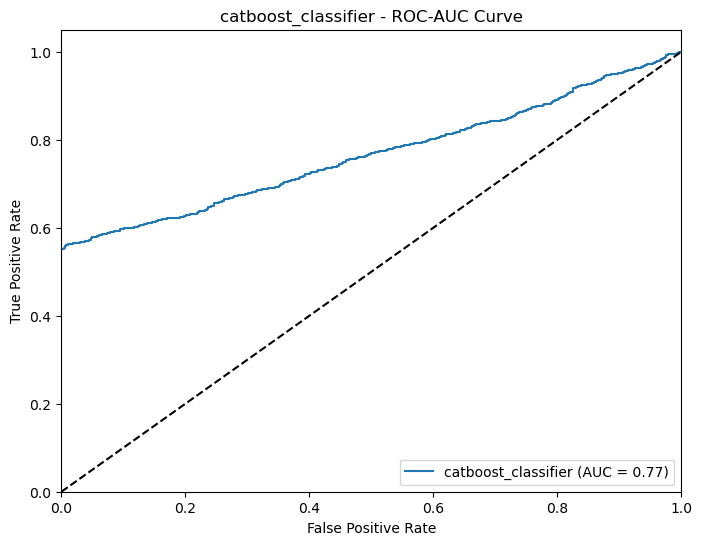

xgboost_classifier Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.48      0.48       948
           1       0.76      0.77      0.76      2052

    accuracy                           0.68      3000
   macro avg       0.62      0.62      0.62      3000
weighted avg       0.67      0.68      0.68      3000



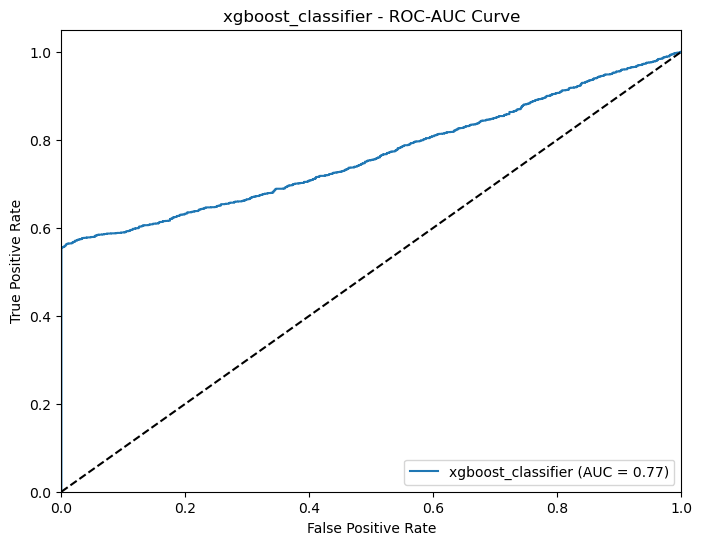

In [15]:
# Train and evaluate models for laptop
train_and_evaluate_laptop_models(laptop_df)

In [46]:
rf = CatBoostClassifier(random_state=42)
rf.fit(X_train_laptops, y_train_laptops)

rf_pred = rf.predict(X_test_laptops)
print(classification_report(y_test_laptops, rf_pred))

Learning rate set to 0.029768
0:	learn: 0.6710800	total: 12.8ms	remaining: 12.8s
1:	learn: 0.6506009	total: 23.1ms	remaining: 11.5s
2:	learn: 0.6308843	total: 32.4ms	remaining: 10.8s
3:	learn: 0.6113017	total: 41.3ms	remaining: 10.3s
4:	learn: 0.5978951	total: 50.1ms	remaining: 9.96s
5:	learn: 0.5805834	total: 58.8ms	remaining: 9.75s
6:	learn: 0.5716709	total: 68.3ms	remaining: 9.7s
7:	learn: 0.5566213	total: 76.9ms	remaining: 9.54s
8:	learn: 0.5426009	total: 85.7ms	remaining: 9.44s
9:	learn: 0.5339619	total: 95.7ms	remaining: 9.48s
10:	learn: 0.5262057	total: 107ms	remaining: 9.63s
11:	learn: 0.5171564	total: 119ms	remaining: 9.83s
12:	learn: 0.5102608	total: 132ms	remaining: 10s
13:	learn: 0.5029862	total: 144ms	remaining: 10.2s
14:	learn: 0.4973018	total: 155ms	remaining: 10.2s
15:	learn: 0.4917383	total: 164ms	remaining: 10.1s
16:	learn: 0.4887032	total: 173ms	remaining: 10s
17:	learn: 0.4843520	total: 182ms	remaining: 9.91s
18:	learn: 0.4810869	total: 190ms	remaining: 9.83s
19:	le

162:	learn: 0.4292377	total: 2.06s	remaining: 10.6s
163:	learn: 0.4291302	total: 2.07s	remaining: 10.6s
164:	learn: 0.4289491	total: 2.08s	remaining: 10.5s
165:	learn: 0.4288251	total: 2.09s	remaining: 10.5s
166:	learn: 0.4286501	total: 2.1s	remaining: 10.5s
167:	learn: 0.4285403	total: 2.11s	remaining: 10.5s
168:	learn: 0.4283756	total: 2.12s	remaining: 10.4s
169:	learn: 0.4282571	total: 2.13s	remaining: 10.4s
170:	learn: 0.4281278	total: 2.14s	remaining: 10.4s
171:	learn: 0.4279971	total: 2.15s	remaining: 10.4s
172:	learn: 0.4277936	total: 2.16s	remaining: 10.3s
173:	learn: 0.4276692	total: 2.17s	remaining: 10.3s
174:	learn: 0.4275305	total: 2.18s	remaining: 10.3s
175:	learn: 0.4273918	total: 2.19s	remaining: 10.3s
176:	learn: 0.4272326	total: 2.2s	remaining: 10.2s
177:	learn: 0.4270492	total: 2.21s	remaining: 10.2s
178:	learn: 0.4269407	total: 2.22s	remaining: 10.2s
179:	learn: 0.4267626	total: 2.23s	remaining: 10.2s
180:	learn: 0.4266183	total: 2.24s	remaining: 10.1s
181:	learn: 0.

322:	learn: 0.4080535	total: 3.96s	remaining: 8.29s
323:	learn: 0.4079294	total: 3.97s	remaining: 8.28s
324:	learn: 0.4077317	total: 3.98s	remaining: 8.27s
325:	learn: 0.4076125	total: 3.99s	remaining: 8.25s
326:	learn: 0.4074506	total: 4s	remaining: 8.23s
327:	learn: 0.4073338	total: 4.01s	remaining: 8.22s
328:	learn: 0.4072383	total: 4.02s	remaining: 8.2s
329:	learn: 0.4071116	total: 4.03s	remaining: 8.19s
330:	learn: 0.4070083	total: 4.04s	remaining: 8.17s
331:	learn: 0.4069077	total: 4.05s	remaining: 8.15s
332:	learn: 0.4067254	total: 4.09s	remaining: 8.19s
333:	learn: 0.4066206	total: 4.11s	remaining: 8.2s
334:	learn: 0.4064531	total: 4.12s	remaining: 8.19s
335:	learn: 0.4062930	total: 4.13s	remaining: 8.17s
336:	learn: 0.4061632	total: 4.14s	remaining: 8.15s
337:	learn: 0.4060489	total: 4.16s	remaining: 8.14s
338:	learn: 0.4059318	total: 4.17s	remaining: 8.12s
339:	learn: 0.4058044	total: 4.18s	remaining: 8.11s
340:	learn: 0.4056686	total: 4.19s	remaining: 8.09s
341:	learn: 0.405

484:	learn: 0.3871753	total: 5.87s	remaining: 6.24s
485:	learn: 0.3870539	total: 5.89s	remaining: 6.23s
486:	learn: 0.3869181	total: 5.94s	remaining: 6.25s
487:	learn: 0.3868046	total: 5.98s	remaining: 6.28s
488:	learn: 0.3867247	total: 6s	remaining: 6.28s
489:	learn: 0.3865958	total: 6.02s	remaining: 6.26s
490:	learn: 0.3864395	total: 6.03s	remaining: 6.25s
491:	learn: 0.3863233	total: 6.03s	remaining: 6.23s
492:	learn: 0.3862082	total: 6.04s	remaining: 6.21s
493:	learn: 0.3860967	total: 6.05s	remaining: 6.2s
494:	learn: 0.3859807	total: 6.06s	remaining: 6.18s
495:	learn: 0.3858955	total: 6.07s	remaining: 6.17s
496:	learn: 0.3857977	total: 6.08s	remaining: 6.16s
497:	learn: 0.3856911	total: 6.09s	remaining: 6.14s
498:	learn: 0.3855641	total: 6.1s	remaining: 6.13s
499:	learn: 0.3854405	total: 6.11s	remaining: 6.11s
500:	learn: 0.3852933	total: 6.12s	remaining: 6.1s
501:	learn: 0.3851738	total: 6.13s	remaining: 6.08s
502:	learn: 0.3850466	total: 6.14s	remaining: 6.07s
503:	learn: 0.3849

645:	learn: 0.3696336	total: 7.76s	remaining: 4.25s
646:	learn: 0.3695525	total: 7.79s	remaining: 4.25s
647:	learn: 0.3694717	total: 7.8s	remaining: 4.24s
648:	learn: 0.3693303	total: 7.81s	remaining: 4.23s
649:	learn: 0.3691953	total: 7.83s	remaining: 4.21s
650:	learn: 0.3691049	total: 7.84s	remaining: 4.2s
651:	learn: 0.3690100	total: 7.85s	remaining: 4.19s
652:	learn: 0.3689211	total: 7.86s	remaining: 4.18s
653:	learn: 0.3688095	total: 7.87s	remaining: 4.16s
654:	learn: 0.3687064	total: 7.88s	remaining: 4.15s
655:	learn: 0.3685986	total: 7.89s	remaining: 4.14s
656:	learn: 0.3684886	total: 7.9s	remaining: 4.13s
657:	learn: 0.3683966	total: 7.91s	remaining: 4.11s
658:	learn: 0.3682928	total: 7.92s	remaining: 4.1s
659:	learn: 0.3681807	total: 7.93s	remaining: 4.09s
660:	learn: 0.3681116	total: 7.95s	remaining: 4.08s
661:	learn: 0.3680094	total: 7.96s	remaining: 4.06s
662:	learn: 0.3679155	total: 7.97s	remaining: 4.05s
663:	learn: 0.3678427	total: 7.98s	remaining: 4.04s
664:	learn: 0.36

813:	learn: 0.3533197	total: 9.79s	remaining: 2.24s
814:	learn: 0.3532223	total: 9.8s	remaining: 2.22s
815:	learn: 0.3531378	total: 9.81s	remaining: 2.21s
816:	learn: 0.3530199	total: 9.82s	remaining: 2.2s
817:	learn: 0.3529399	total: 9.83s	remaining: 2.19s
818:	learn: 0.3528551	total: 9.84s	remaining: 2.17s
819:	learn: 0.3527575	total: 9.85s	remaining: 2.16s
820:	learn: 0.3526537	total: 9.86s	remaining: 2.15s
821:	learn: 0.3525823	total: 9.88s	remaining: 2.14s
822:	learn: 0.3525002	total: 9.88s	remaining: 2.13s
823:	learn: 0.3524079	total: 9.9s	remaining: 2.11s
824:	learn: 0.3522899	total: 9.91s	remaining: 2.1s
825:	learn: 0.3521322	total: 9.92s	remaining: 2.09s
826:	learn: 0.3520520	total: 9.93s	remaining: 2.08s
827:	learn: 0.3519537	total: 9.94s	remaining: 2.06s
828:	learn: 0.3518407	total: 9.95s	remaining: 2.05s
829:	learn: 0.3517535	total: 9.96s	remaining: 2.04s
830:	learn: 0.3516617	total: 9.97s	remaining: 2.03s
831:	learn: 0.3515510	total: 9.98s	remaining: 2.02s
832:	learn: 0.35

989:	learn: 0.3371766	total: 12s	remaining: 121ms
990:	learn: 0.3370790	total: 12s	remaining: 109ms
991:	learn: 0.3370308	total: 12s	remaining: 97.1ms
992:	learn: 0.3369520	total: 12.1s	remaining: 85ms
993:	learn: 0.3368715	total: 12.1s	remaining: 72.8ms
994:	learn: 0.3367316	total: 12.1s	remaining: 60.7ms
995:	learn: 0.3366125	total: 12.1s	remaining: 48.5ms
996:	learn: 0.3365494	total: 12.1s	remaining: 36.4ms
997:	learn: 0.3364903	total: 12.1s	remaining: 24.3ms
998:	learn: 0.3364049	total: 12.1s	remaining: 12.1ms
999:	learn: 0.3362971	total: 12.1s	remaining: 0us
              precision    recall  f1-score   support

           0       0.50      0.48      0.49       948
           1       0.76      0.77      0.77      2052

    accuracy                           0.68      3000
   macro avg       0.63      0.63      0.63      3000
weighted avg       0.68      0.68      0.68      3000



In [47]:
# The best model is Catboost Classifier model
import joblib

# Save the model to a file
joblib.dump(rf, 'laptop_model.joblib')

['laptop_model.joblib']

In [21]:
# Train and test machine learning models for servers
def train_and_evaluate_server_models(df):
    X_train, X_test, y_train, y_test = preprocess_server_data(df)

    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
        "SVC": SVC(probability=True),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "server_catboost_classifier" : CatBoostClassifier(random_state=42),
        "server_xgboost_classifier" : XGBClassifier(seed=42)
    }

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        # # Feature Importance
        # if hasattr(model, 'feature_importances_'):
        #     feature_importance = model.feature_importances_
        # else:
        #     # Logistic Regression doesn't have feature_importances_, use coefficients for feature importance
        #     feature_importance = np.abs(model.coef_[0])

        # # Plot Feature Importance
        # plt.figure(figsize=(8, 6))
        # plt.barh(range(len(feature_importance)), feature_importance, align='center')
        # plt.yticks(range(len(feature_importance)), df.drop(columns=['Server ID', 'Server Name', 'Target']).columns)
        # plt.xlabel('Feature Importance')
        # plt.title(f'{model_name} - Feature Importance')
        # plt.tight_layout()
        # plt.show()

        # Classification Report
        print(f"{model_name} Classification Report:")
        print(classification_report(y_test, y_pred))

        # ROC-AUC Curve
        roc_auc = roc_auc_score(y_test, y_prob)
        fpr, tpr, _ = roc_curve(y_test, y_prob)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} - ROC-AUC Curve')
        plt.legend(loc='lower right')
        plt.show()

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.68      0.72      1000
           1       0.85      0.89      0.87      2000

    accuracy                           0.82      3000
   macro avg       0.80      0.79      0.79      3000
weighted avg       0.82      0.82      0.82      3000



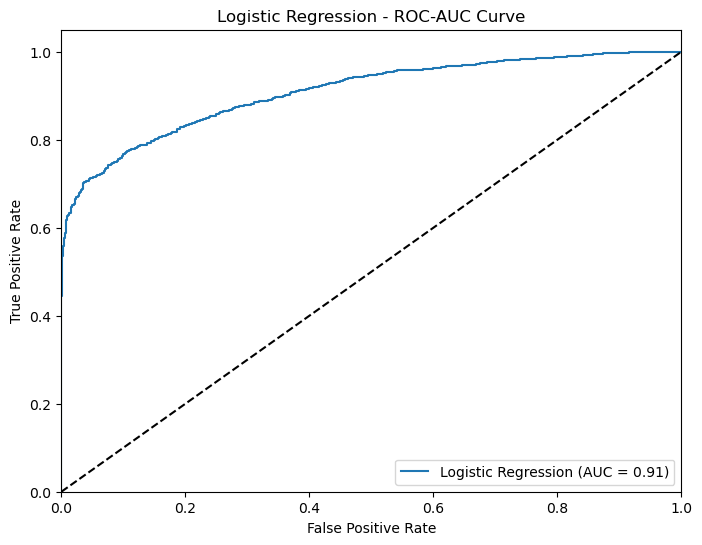

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00      2000

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



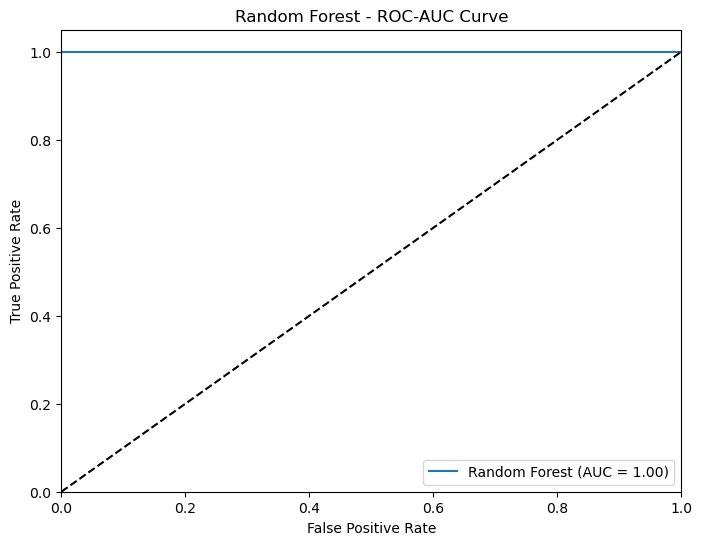

KeyboardInterrupt: 

In [22]:
# Train and evaluate models for servers
train_and_evaluate_server_models(server_df)

In [23]:
rf_1 = RandomForestClassifier(n_estimators=500, random_state=42)
rf_1.fit(X_train_servers, y_train_servers)

rf_1_pred = rf_1.predict(X_test_servers)
print(classification_report(y_test_servers, rf_1_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00      2000

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [44]:
# The best model is Catboost Classifier model
import joblib

# Save the model to a file
joblib.dump(rf_1, 'server_model.joblib')

['server_model.joblib']

In [40]:
server_pred

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)